In [1]:
# Instalando e atualizando as bibliotecas necessárias
!pip install pyDOE
!pip install -U seaborn

In [14]:
# Importando RASD Toolbox
from RASD_TOOLBOX import *
# Importando Numpy toolbox
import numpy as n
import pandas as pd

In [18]:
w = ['NORMAL', 0.25, 0.025]
P = ['NORMAL', 10.2, 1.12]
Fy = ['NORMAL', 40.3, 4.64]

POP = [1000, 1000000]

#POP = np.arange(10,1000000, 10000).tolist() # (x,y,Z); x=pop inicial; y=pop final; z=variacao pop

SETUP = {'N_REP': len(POP),
        'POP': POP,
        'N_G': 2,
        'D': 3,
        'VARS': [w, P, Fy],
        'MODEL': 'MCS'}

In [19]:
def OBJ(X):
        
    w = X[0]
    P = X[1]
    Fy = X[2]
    
    
    # STATE LIMIT FUNCTION
    
    R_0 = 80 * Fy
    S_0 = 54 * P + 5832 * w
    G_0 = S_0 - R_0
    
    R_1 = 80 * Fy
    S_1 = 54 * P + 5832 * w
    G_1 = S_1 - R_1

    R = [R_0, R_1] 
    S = [S_0, S_1] 
    G = [G_0, G_1]
   
    return R, S, G

In [20]:
RESULTS_TEST = RASD_STOCHASTIC(SETUP, OBJ)

In [21]:
RESULTS_TEST[len(POP)-1]

{'TOTAL RESULTS':              X_0        X_1        X_2          R_0          R_1          S_0  \
 0       0.201885   8.389456  37.400707  2992.056562  2992.056562  1630.421162   
 1       0.213149  12.221216  40.754627  3260.370166  3260.370166  1903.030592   
 2       0.288316   9.392777  34.535359  2762.828720  2762.828720  2188.668574   
 3       0.246411  11.359514  47.280878  3782.470227  3782.470227  2050.482710   
 4       0.260263   9.351341  36.861253  2948.900248  2948.900248  2022.825325   
 ...          ...        ...        ...          ...          ...          ...   
 999995  0.268978  10.216431  36.954366  2956.349262  2956.349262  2120.367602   
 999996  0.258742  10.306216  42.398945  3391.915630  3391.915630  2065.516410   
 999997  0.251717  10.306147  32.997544  2639.803538  2639.803538  2024.544729   
 999998  0.234622  12.387418  46.636577  3730.926132  3730.926132  2037.237293   
 999999  0.251798  12.377029  41.778782  3342.302592  3342.302592  2136.844383   

In [22]:
DADOS = RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']

In [23]:
RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']['I_0'].sum()

1351.0

C:\Users\wander\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


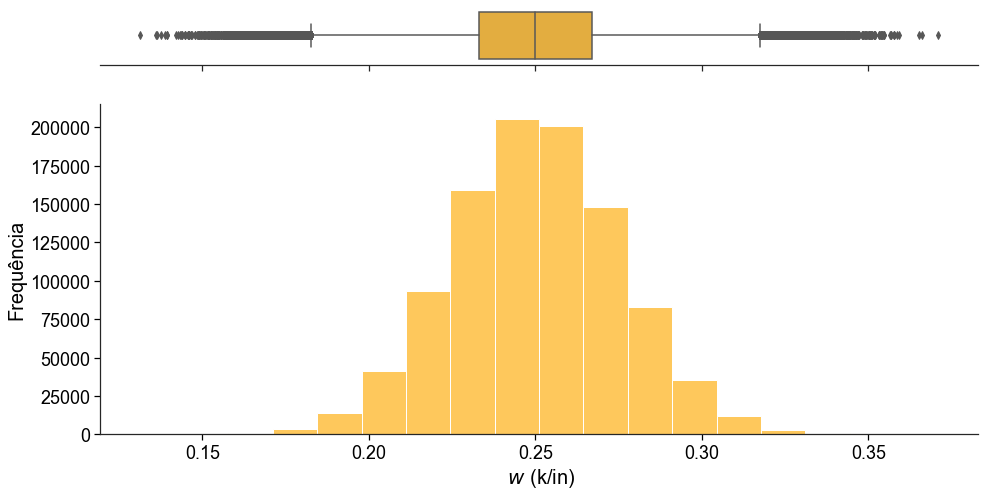

In [24]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'WIDTH': 0.40, 
                'HEIGHT': 0.20, 
                'X AXIS SIZE': 18,
                'Y AXIS SIZE': 18,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': ' $w$ (k/in)',
                'LABELS SIZE': 20,
                'LABELS COLOR': '#000000',  
                'CHART COLOR': '#FEB625',
                'KDE': False,
                'DPI': 600, 
                'BINS' : 18,
                'EXTENSION': '.svg'}
# RESULTS X_0 VARIABLE
OPCOES_DADOS = {'DATASET': DADOS, 'COLUMN': 'X_0'}      
# CALL PLOT
RASD_PLOT_1(OPCOES_DADOS, OPCOES_GRAFICAS)

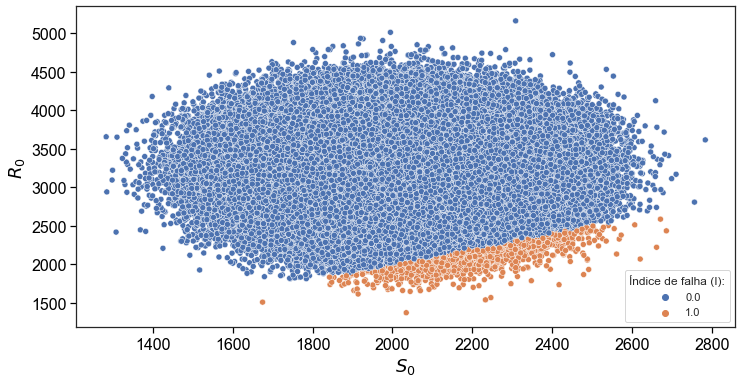

In [25]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.300, 
                'HEIGHT': 0.150,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'LOC LEGEND': 'lower right',
                'TITLE LEGEND': 'Índice de falha (I):'}
# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'HUE VALUE': 'I_0'}    
# CALL PLOT
RASD_PLOT_2(OPCOES_DADOS, OPCOES_GRAFICAS)

In [26]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                'EXTENSION': '.svg',
                'DPI': 600,
                'WIDTH': 0.20, 
                'HEIGHT': 0.10,              
                'X DATA': 'S_0',
                'Y DATA': 'R_0',
                'X AXIS SIZE': 16,
                'Y AXIS SIZE': 16,
                'AXISES COLOR': '#000000',
                'X AXIS LABEL': '$S_0$',
                'Y AXIS LABEL': '$R_0$',
                'LABELS SIZE': 18,
                'LABELS COLOR': '#000000',
                'G VALUE': 'G_0',
                'TRANSPARENCY': 0.8,
                'COLOR MAP': 'viridis'}


# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'S_0', 'Y DATA': 'R_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_3(OPCOES_DADOS, OPCOES_GRAFICAS)

Error in callback <function flush_figures at 0x000001274B42F9D0> (for post_execute):


KeyboardInterrupt: 

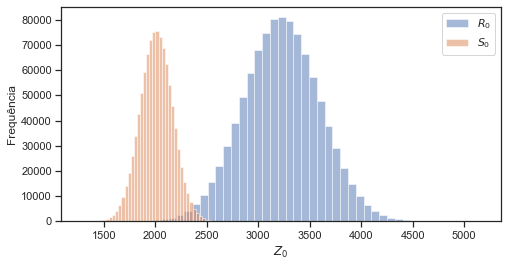

In [27]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X DATA': 'S_0',
                    'Y DATA': 'R_0',
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#00000',
                    'X AXIS LABEL': '$Z_0$',
                    'Y AXIS LABEL': 'Frequência',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'C VALUE': 'G_0',
                    'TRANSPARENCY': 0.8,
                    'COLOR MAP': 'viridis',
                    'BINS': '50',
                    'ALPHA': '0.5'}

# RESULTS
OPCOES_DADOS = {'DATASET': DADOS, 'X DATA': 'R_0', 'Y DATA': 'S_0', 'G VALUE': 'G_0'}       

# CALL PLOT
RASD_PLOT_4(OPCOES_DADOS, OPCOES_GRAFICAS)

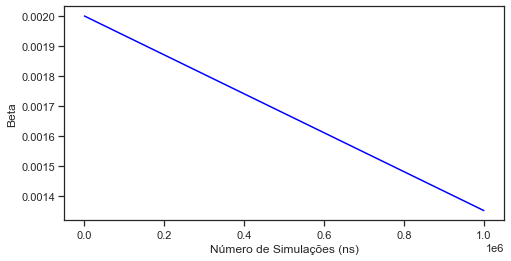

In [28]:
OPCOES_GRAFICAS = {'NAME': 'WANDER',
                    'EXTENSION': '.svg',
                    'DPI': 600,
                    'WIDTH': 0.20,
                    'HEIGHT': 0.10,
                    'X AXIS SIZE': 20,
                    'Y AXIS SIZE': 20,
                    'AXISES COLOR': '#000000',
                    'X AXIS LABEL': 'Número de Simulações (ns)',
                    'Y AXIS LABEL': 'Beta',
                    'LABELS SIZE': 16,
                    'LABELS COLOR': '#000000',
                    'CHART COLOR': 'blue',
                    'POPULATION' : POP,
                    'TYPE' : 'pf'}

# RESULTS
OPCOES_DADOS = {'DATASET': RESULTS_TEST}       

# CALL PLOT
RASD_PLOT_5(OPCOES_DADOS, OPCOES_GRAFICAS)

In [ ]:
max(POP)

In [ ]:
plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

In [ ]:
#MESMO DATAFRAME
Bf = [ ]
Af = [ ]
c = 100
BETA_DF = pd.read_csv('RASD_TOOLBOX/beta_df.txt', delimiter = ";",  names = ['PF' ,'BETA'])

for i in POP:
   Af.append((RESULTS_TEST[len(POP)-1]['TOTAL RESULTS']['I_0'].head(i).sum())/max(POP)) # soma valores anteriores de I_0 e calcula PF

df = pd.DataFrame(Af,columns=['Pf']) #converte para DF

for i in range(len(POP)): #Salva os valores em um DF a cada 100 valores
    Bf.append((BETA_DF['PF'].sub(Af[i]).abs().idxmin())/1000)
  
plt.plot(POP, Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']),c)), Bf, color='blue')

#plt.plot( pd.Series(range(0,len(RESULTS_TEST[0]['TOTAL RESULTS']))), RESULTS_TEST[0]['TOTAL RESULTS']['I_0'], color='blue')

In [ ]:
plt.plot(POP, Af, color='blue')

In [ ]:
PF_AUX = []
BETA_AUX = []

for i in range (len(POP)):
    PF_AUX.append(RESULTS_TEST[i]['PROBABILITY OF FAILURE'][0])
    BETA_AUX.append(RESULTS_TEST[i]['BETA INDEX'][0])

plt.plot(POP, PF_AUX, color='blue')

In [ ]:
plt.plot(POP, BETA_AUX, color='blue')